Figure 4B,D
(B) Cryptic 5’ and 3’ss are lacking binding of key spliceosome components. Lines show binding frequency of PRPF8 at the 5’ss (left) and SF3B4 at the 3’ss (right) with 5th to 95th percentile shaded. (D) Cryptic 3’ss are bound by the U2AF complex similarly to canonical junctions. Lines show binding frequency of U2AF2  (left) and U2AF2 (right) at the 3’ss with 5th to 95th percentile shaded. 

In [1]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
from scipy.signal import savgol_filter

In [2]:
ki_5_3 = '../../data/eclip_overlaps/encode/ki_matching_5_250_i_75_e_3ss_overlaps/'
ki_3_5 = '../../data/eclip_overlaps/encode/ki_matching_3_250_i_75_e_5ss_overlaps/'

matching_5_3 = '../../data/eclip_overlaps/encode/matching_5_250_i_75_e_3ss_overlaps/'
matching_3_5 = '../../data/eclip_overlaps/encode/matching_3_250_i_75_e_5ss_overlaps/'

meta_2 = pd.read_csv(
    '../../data/eclip_overlaps/eclip_metadata.tsv',
    sep='\t',
    index_col = 0
)

In [3]:
def plot_density_5ss(target,uj_dir,ax,nam,num,ax_color,line_color):
    
    pos2 = [int(i) for i in np.linspace(-75,249,325)]
    
    meta_df = meta_2[meta_2['target'] == target]
    
    k562_samps = meta_df[meta_df['cell_line'] == 'K562'].index
    hep_samps = meta_df[meta_df['cell_line'] == 'HepG2'].index
    
    for i in k562_samps:
        filenam = uj_dir + i +'/peak_summary.txt'
        uj_df = pd.read_csv(
            filenam,
            sep='\t',
            header=None,
            index_col=0
        )

        ax.plot(
            pos2,
            savgol_filter(uj_df.iloc[0,:],11,3),
            c=line_color,
            linestyle='-',
            label=nam
        )
        
        ax.fill_between(
            pos2, 
            savgol_filter(uj_df.iloc[1,:],11,3), 
            savgol_filter(uj_df.iloc[2,:],11,3), 
            alpha=0.3,
            color=line_color
        )

    ax.axvline(
        0,
        linestyle='--', 
        c='k', 
    )
    
    ax.set_xlabel(
        'Relative Position', 
        fontsize=14
    )
    ax.set_ylabel(
        'Peak frequency', 
        fontsize=14
    )
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


    
def plot_density_3ss(target,uj_dir,ax,nam,num,ax_color,line_color):
    
    pos2 = [int(i) for i in np.linspace(-250,74,325)]
    
    meta_df = meta_2[meta_2['target'] == target]
    
    k562_samps = meta_df[meta_df['cell_line'] == 'K562'].index
    hep_samps = meta_df[meta_df['cell_line'] == 'HepG2'].index
    
    for i in hep_samps:
        filenam = uj_dir + i +'/peak_summary.txt'
        uj_df = pd.read_csv(
            filenam,
            sep='\t',
            header=None,
            index_col=0
        )

        ax.plot(
            pos2,
            savgol_filter(uj_df.iloc[0,:],11,3),
            c=line_color,
            linestyle='-',
            label=nam
        )
        
        ax.fill_between(
            pos2, 
            savgol_filter(uj_df.iloc[1,:],11,3), 
            savgol_filter(uj_df.iloc[2,:],11,3), 
            alpha=0.3,
            color=line_color
        )


    ax.axvline(
        0,
        linestyle='--', 
        c='k', 
    )
    
    ax.set_xlabel(
        'Relative Position', 
        fontsize=14
    )
    ax.set_ylabel(
        'Peak frequency', 
        fontsize=14
    )
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    
    
def plot_comparison_3ss_2(target,num):
    fig, ax1 = plt.subplots(1,1, figsize=(4,3))

    plot_density_3ss(target, ki_5_3, ax=ax1, nam='known intron',num=num,ax_color='k',line_color='tab:grey')

    plot_density_3ss(target, matching_5_3, ax=ax1, nam='DHX15',num=num,ax_color='k',line_color='tab:red')

    ax1.set_xlabel("3' splice site")
    
    ax1.set_ylabel('Binding Frequency')
    plt.legend()

    
def plot_comparison_5ss_2(target,num):
    fig, ax1 = plt.subplots(1,1, figsize=(4,3))

    plot_density_5ss(target, ki_3_5, ax=ax1, nam='known intron',num=num,ax_color='k',line_color='tab:grey')

    plot_density_5ss(target, matching_3_5, ax=ax1, nam='DHX15',num=num,ax_color='k',line_color='tab:red')

    ax1.set_xlabel("5' splice site")
    
    ax1.set_ylabel('Binding Frequency')
    plt.legend()



Text(0.5, 0.94, 'U2AF2')

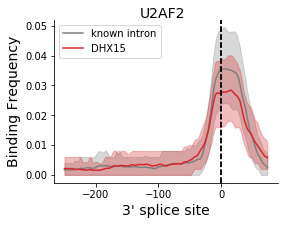

In [4]:
plot_comparison_3ss_2('U2AF2-human',500)
plt.suptitle('U2AF2',fontsize=14,y=0.94)

Text(0.5, 0.94, 'U2AF1')

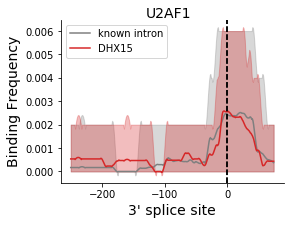

In [5]:
plot_comparison_3ss_2('U2AF1-human',500)
plt.suptitle('U2AF1',fontsize=14,y=0.94)

Text(0.5, 0.94, 'SF3B4')

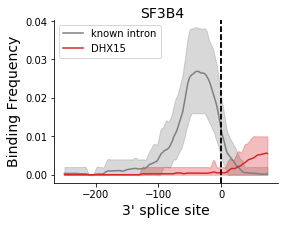

In [6]:
plot_comparison_3ss_2('SF3B4-human',500)
plt.suptitle('SF3B4',fontsize=14,y=0.94)

Text(0.5, 0.94, 'PRPF8')

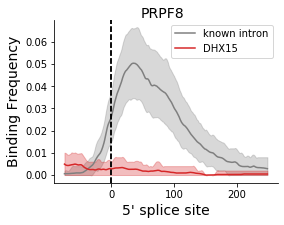

In [7]:
plot_comparison_5ss_2('PRPF8-human',500)
plt.suptitle('PRPF8',fontsize=14,y=0.94)

Figure 4E,F
(E) SF3B4 binds to canonical splice sites with a higher frequency than U2AF2. Bar plot depicts fraction of total SF3B4 and U2AF2 peaks that overlap with canonical splice sites used in SUM159 FKBP-DHX15 cells treated with dTAG13.
(F) DHX15 degradation leads to increased splicing of U2AF2-bound sites. Bar plot depicts fraction of SF3B4 and U2AF2 peaks that overlap with cryptic splice sites compared to peaks that do not overlap with canonical splice sites.


In [1]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyranges

from natsort import os_sorted


In [2]:
filelist = os_sorted(glob.glob('../../data/eclip_overlaps/ip_peaks_exp_genes/*IDR.txt'))
filelist

['../../data/eclip_overlaps/ip_peaks_exp_genes/SF3B4_K562_IDR.txt',
 '../../data/eclip_overlaps/ip_peaks_exp_genes/U2AF2_K562_IDR.txt']

In [3]:
sf3b4_test = pd.read_csv(filelist[0],sep='\t',header=None)
u2af2_test = pd.read_csv(filelist[1],sep='\t',header=None)


In [4]:
sf3b4_filt = sf3b4_test.iloc[:,[0,1,2,5]]
sf3b4_filt.columns = ['Chromosome','Start','End','Strand']

u2af2_filt = u2af2_test.iloc[:,[0,1,2,5]]
u2af2_filt.columns = ['Chromosome','Start','End','Strand']

In [5]:
sf3b4_range = pyranges.PyRanges(sf3b4_filt)
u2af2_range = pyranges.PyRanges(u2af2_filt)


In [6]:
def shift_ranges(df,num):
    tmp = df
    tmp.loc[
        tmp['Strand']=='-',
        ['Start','End']
    ]-=num
    tmp.loc[
        tmp['Strand']=='+',
        ['Start','End']
    ]+=num
    
    return tmp

In [7]:
overlaps_1 = []

for i in range(0,50):
    sf3b4_filt = sf3b4_test.iloc[:,[0,1,2,5]]
    sf3b4_filt.columns = ['Chromosome','Start','End','Strand']

    sf3b4_tmp = pyranges.PyRanges(shift_ranges(sf3b4_filt,i))
    overlaps_1.append(len(sf3b4_tmp.overlap(u2af2_range)))


/storage/cylin/home/bmho/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
meta = pd.read_csv('../../data/dtag_experiments/sum159_all_meta.tsv',sep='\t')

In [9]:
meta_filt = meta.loc[
    (meta['Cell line'] == 'SUM159') &
    (meta['Target'] == 'DHX15') &
    (meta['Clone'] == 'D12') &
    (meta['Time value'] == 9) &
    (
        (meta['Dosage value'] == 0) |
        (meta['Dosage value'] == 500)
    )
]


In [10]:
def get_sj(meta_df):
    filelist = []
    for i,row in meta_df.iterrows():
        filepath = '../../data/dtag_experiments/' + \
            row['Target'] + \
            '/sj_out/'+ \
            row['Sample basename']
        filelist.append(glob.glob(filepath+'*')[0])
    return filelist


def get_ki_coords(filenam):
    test = pd.read_csv(filenam,sep='\t',dtype='object')
    test['unique'] = test['unique'].astype(float)
    test_filt = test[
        (test['unique'] >= 3) \
        & (test['class'] == 'known intron')
    ]
    test_filt.loc[
        test_filt['strand']== '+',
        'start'
    ] = test_filt['end']
    test_filt.loc[
        test_filt['strand']== '-',
        'end'
    ] = test_filt['start']
    return test_filt

def get_matching_5_coords(filenam):
    test = pd.read_csv(filenam,sep='\t',dtype='object')
    test['unique'] = test['unique'].astype(float)
    test_filt = test[
        (test['unique'] >= 3) \
        & (test['class'] == 'matching 5')
    ]
    test_filt.loc[
        test_filt['strand']== '+',
        'start'
    ] = test_filt['end']
    test_filt.loc[
        test_filt['strand']== '-',
        'end'
    ] = test_filt['start']
    return test_filt

In [12]:
meta_filt['filepath'] = get_sj(meta_filt)

/storage/cylin/home/bmho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
ki_coords = [get_ki_coords(i) for i in meta_filt['filepath']]
match_5_coords = [get_matching_5_coords(i) for i in meta_filt['filepath']]

In [14]:
ki_ranges = []
for tab in ki_coords:
    tab_filt = tab.iloc[:,0:4]
    tab_filt.columns = ['Chromosome','Start','End','Strand']
    ki_ranges.append(pyranges.PyRanges(tab_filt))
    
match_5_ranges = []
for tab in match_5_coords:
    tab_filt = tab.iloc[:,0:4]
    tab_filt.columns = ['Chromosome','Start','End','Strand']
    match_5_ranges.append(pyranges.PyRanges(tab_filt))

In [15]:
sf3b4_filt = sf3b4_test.iloc[:,[0,1,2,5]]
sf3b4_filt.columns = ['Chromosome','Start','End','Strand']

sf3b4_shift = pyranges.PyRanges(shift_ranges(sf3b4_filt,np.argmax(overlaps_1)))

In [16]:
def jxn_overlap_1(ip_range,ki_range):
    
    overlap_range = ip_range.overlap(ki_range)
    test = pd.merge(ip_range.df,overlap_range.df, how='outer', indicator=True)
    non_overlap_range = pyranges.PyRanges(test.loc[
        test['_merge'] == 'left_only',
        ['Chromosome','Start','End','Strand']
    ])
    return len(overlap_range)/len(ip_range)    
    

def jxn_overlap_1_counter(ip_range,ki_range):
    
    overlap_range = ip_range.overlap(ki_range)
    test = pd.merge(ip_range.df,overlap_range.df, how='outer', indicator=True)
    non_overlap_range = pyranges.PyRanges(test.loc[
        test['_merge'] == 'left_only',
        ['Chromosome','Start','End']
    ])
    return str(len(overlap_range))    

def jxn_overlap_2(ip_range,ki_range,match_5_range):    
    overlap_range = ip_range.overlap(ki_range)
    test = pd.merge(ip_range.df,overlap_range.df, how='outer', indicator=True)
    non_overlap_range = pyranges.PyRanges(test.loc[
        test['_merge'] == 'left_only',
        ['Chromosome','Start','End','Strand']
    ])
    return len(non_overlap_range.overlap(match_5_range))/len(non_overlap_range)

Text(36.125, 0.5, "Fraction peaks overlapping canonical 3'ss")

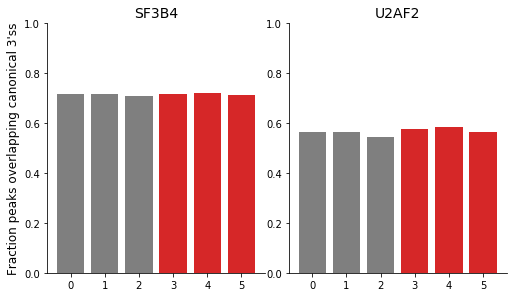

In [17]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,4))

bp1 = ax1.bar(
    range(6),
    [jxn_overlap_1(sf3b4_shift,i) for i in ki_ranges],
    color=['tab:grey']*3 + ['tab:red']*3
)

bp2 = ax2.bar(
    range(6),
    [jxn_overlap_1(u2af2_range,i) for i in ki_ranges],
    color=['tab:grey']*3 + ['tab:red']*3
)

plt.tight_layout(w_pad=0.1)

for ax in [ax1,ax2]:
    ax.set_ylim([0,1])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
ax1.set_title('SF3B4', fontsize=14)
ax2.set_title('U2AF2', fontsize=14)

ax1.set_ylabel("Fraction peaks overlapping canonical 3'ss", fontsize=12)

Text(23.5, 0.5, "peaks overlapping cryptic 3'ss/ \n peaks not overlapping canonical 3'ss")

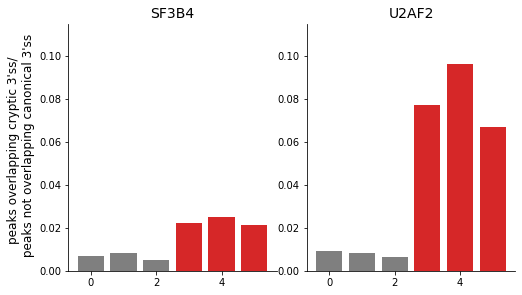

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,4))

bp1 = ax1.bar(
    range(6),
    [jxn_overlap_2(sf3b4_shift,i,j) for i,j in zip(ki_ranges,match_5_ranges)],
    color=['tab:grey']*3 + ['tab:red']*3
)

bp2 = ax2.bar(
    range(6),
    [jxn_overlap_2(u2af2_range,i,j) for i,j in zip(ki_ranges,match_5_ranges)],
    color=['tab:grey']*3 + ['tab:red']*3
)

plt.tight_layout(w_pad=0.1)

for ax in [ax1,ax2]:
    ax.set_ylim([0,0.115])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

ax1.set_title('SF3B4', fontsize=14)
ax2.set_title('U2AF2', fontsize=14)

ax1.set_ylabel("peaks overlapping cryptic 3'ss/ \n peaks not overlapping canonical 3'ss", fontsize=12)

Figure 4K,L
(K, L) Degradation of DHX15 increases SF3B4 binding at cryptic 3’ splice sites. Lines show binding frequency of SF3B4 in SUM159 cells (K) at baseline and (L) upon DHX15 degradation  with 5th to 95th percentile shaded. Canonical and cryptic splice sites are defined based on RNAseq of SUM159 FKBP-DHX15 cells treated with dTAG13.

In [2]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
from scipy.signal import savgol_filter

In [3]:
ki_5_3 = '../../data/eclip_overlaps/sum159/ki_matching_5_250_i_75_e_3ss_overlaps/'

matching_5_3 = '../../data/eclip_overlaps/sum159/matching_5_250_i_75_e_3ss_overlaps/'


In [4]:
def plot_density_3ss(target,uj_dir,ax,nam,num,ax_color,line_color):
    
    pos2 = [int(i) for i in np.linspace(-250,74,325)]
    
    
    filenam = uj_dir + target +'/peak_summary.txt'
    uj_df = pd.read_csv(
        filenam,
        sep='\t',
        header=None,
        index_col=0
    )

    ax.plot(
        pos2,
        savgol_filter(uj_df.iloc[0,:],11,3),
        c=line_color,
        alpha=0.8,
        linestyle='-',
        label=nam
    )

    ax.fill_between(
        pos2, 
        savgol_filter(uj_df.iloc[1,:],11,3), 
        savgol_filter(uj_df.iloc[2,:],11,3), 
        alpha=0.3,
        color=line_color
    )

    ax.axvline(
        0,
        linestyle='--', 
        c='k', 
    )
    
    ax.set_xlabel(
        'Relative Position', 
        fontsize=14
    )
    ax.set_ylabel(
        'Peak frequency', 
        fontsize=14
    )
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

def plot_comparison_3ss_2(target,num):
    fig, ax1 = plt.subplots(1,1, figsize=(4,3))

    plot_density_3ss(target, ki_5_3, ax=ax1, nam='canonical ss',num=num,ax_color='k',line_color='tab:grey')

    plot_density_3ss(target, matching_5_3, ax=ax1, nam='cryptic ss',num=num,ax_color='k',line_color='tab:red')

    ax1.set_xlabel("3' splice site")
    
    ax1.set_ylabel('Binding Frequency')
    plt.legend()
    plt.title(target, fontsize=12)



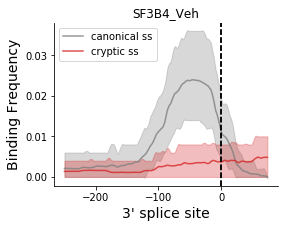

In [5]:
plot_comparison_3ss_2('SF3B4_Veh',500)

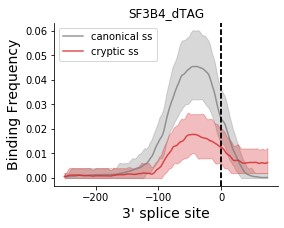

In [6]:
plot_comparison_3ss_2('SF3B4_dTAG',500)